# Cleaning and EDA

## Overview: Loading, Initial Observations, and Cleaning umpire datasets


---
## Project Workflow:
1. **Step 1: Load and Clean Initial Data**
2. **Step 2: EDA to Select Priors**


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from seaborn import pairplot


# Load and Clean Initial Data

In [63]:
# prep
umpire_files = ["Umpire_1.csv", "Umpire_2.csv", "Umpire_3.csv"]
columns_to_drop = ['on_1b', 'on_2b', 'on_3b', 'at_bat_number', "game_year"] # drop bc not consistent across games

#----- Step 3: Check Packaging -----
def write_diagnostics(df: pd.DataFrame, stage: str, path: str):
    with open(path, "a") as log:
        log.write(f"\n\n=== {stage} ===\n\n")
        df.info(buf=log)
        log.write("\n\n--- Head ---\n")
        log.write(df.head().to_string())
        log.write("\n\n--- Describe ---\n")
        log.write(df.describe(include='all').to_string())

for file in umpire_files:
    #----- Step 2: Access Data #-----
    df = pd.read_csv("data/" + file)
    
    #----- Step 3: Check Packaging -----
    key = file.replace(".csv", "")
    log_path = f"data/cleaned/logs/{key}_log.txt"
    open(log_path, "w").close() # Clear previous logs
    
    #----- Step 4: Clean Data -----
    
    # Drop irrelevant columns
    df = df.drop(columns=columns_to_drop, errors='ignore')
    df = df.dropna()
    write_diagnostics(df, f"{key} RAW", log_path)

    # Convert manually bc encoding does it backwards
    df['error_in_decision'] = df['error_in_decision'].map({'correct': 0, 'incorrect': 1})

	# one-hot encode
    non_numeric_cols = df.select_dtypes(exclude=['number']).columns
    df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)
    write_diagnostics(df, f"{key} ENCODED", log_path)

	# Scaling
    numeric_cols = df.select_dtypes(include='number').columns
    scaler = StandardScaler()
    cols_to_scale = [col for col in numeric_cols if df[col].nunique() > 2]
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    write_diagnostics(df, f"{key} SCALED", log_path)

	#----- Step 5: Save Data -----
    df.to_csv(f"data/cleaned/{key}_cleaned.csv", index=False)
    
    #----- Step 3: Check Packaging -----
    with open(log_path, "a") as log:
        log.write("\n\n=== FINAL SUMMARY ===\n\n")
        log.write(f"{key} cleaned → shape: {df.shape} | Target distribution:\n{df['error_in_decision'].value_counts().to_string()}\n")


In [64]:
# 1
file_path = r"data/cleaned/Umpire_1_cleaned.csv"
ump1 = pd.read_csv(file_path)

# 2
file_path = r"data/cleaned/Umpire_2_cleaned.csv"
ump2 = pd.read_csv(file_path)

# 3
file_path = r"data/cleaned/Umpire_3_cleaned.csv"
ump3 = pd.read_csv(file_path)

# EDA to Select Priors

## Correlogram
- drop one variable out of highly correlated pairs if reasonable

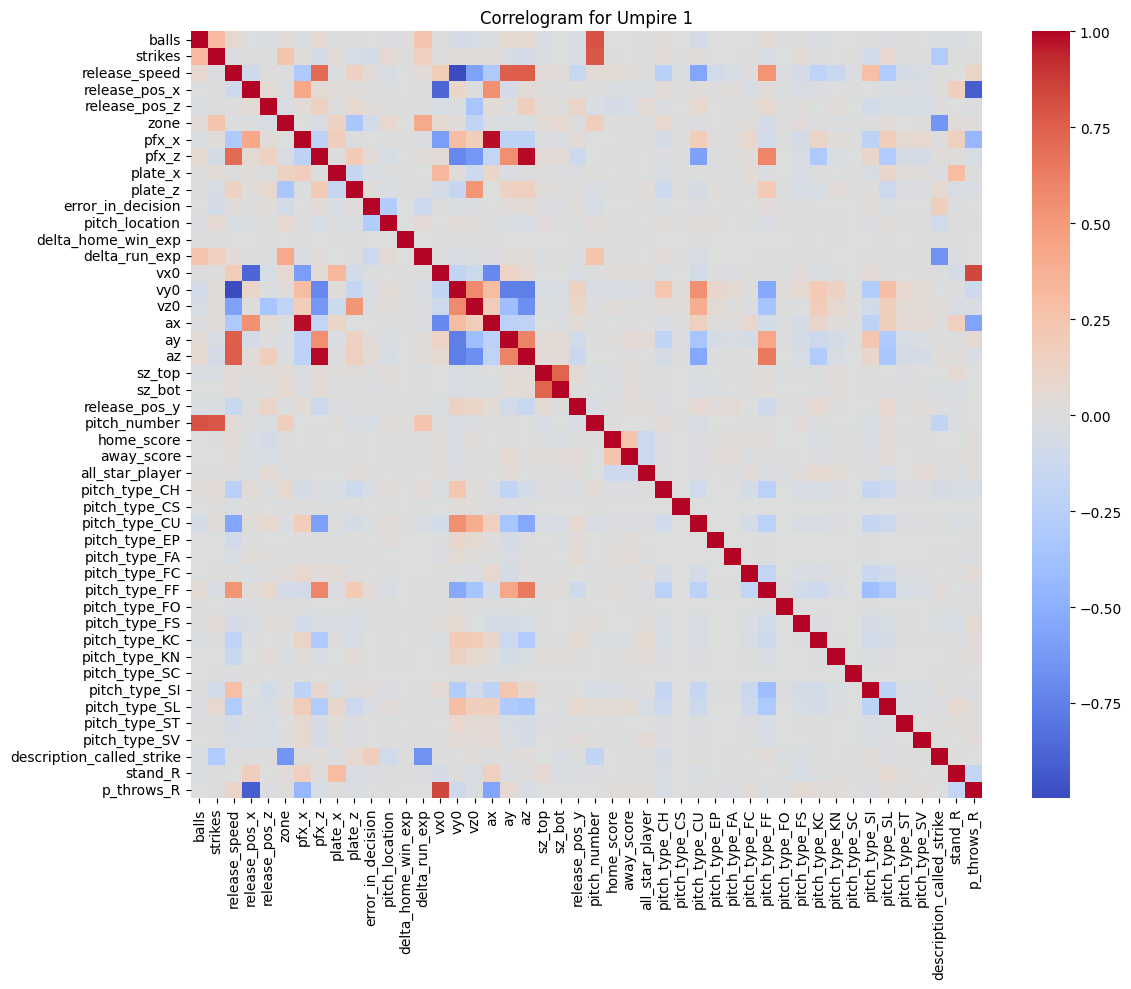

In [65]:
corr1 = ump1.corr(numeric_only=True)

plt.figure(figsize=(12, 10), layout="tight")
sns.heatmap(corr1, cmap='coolwarm', center=0, annot_kws={"size": 5})
plt.title("Correlogram for Umpire 1")
plt.show()

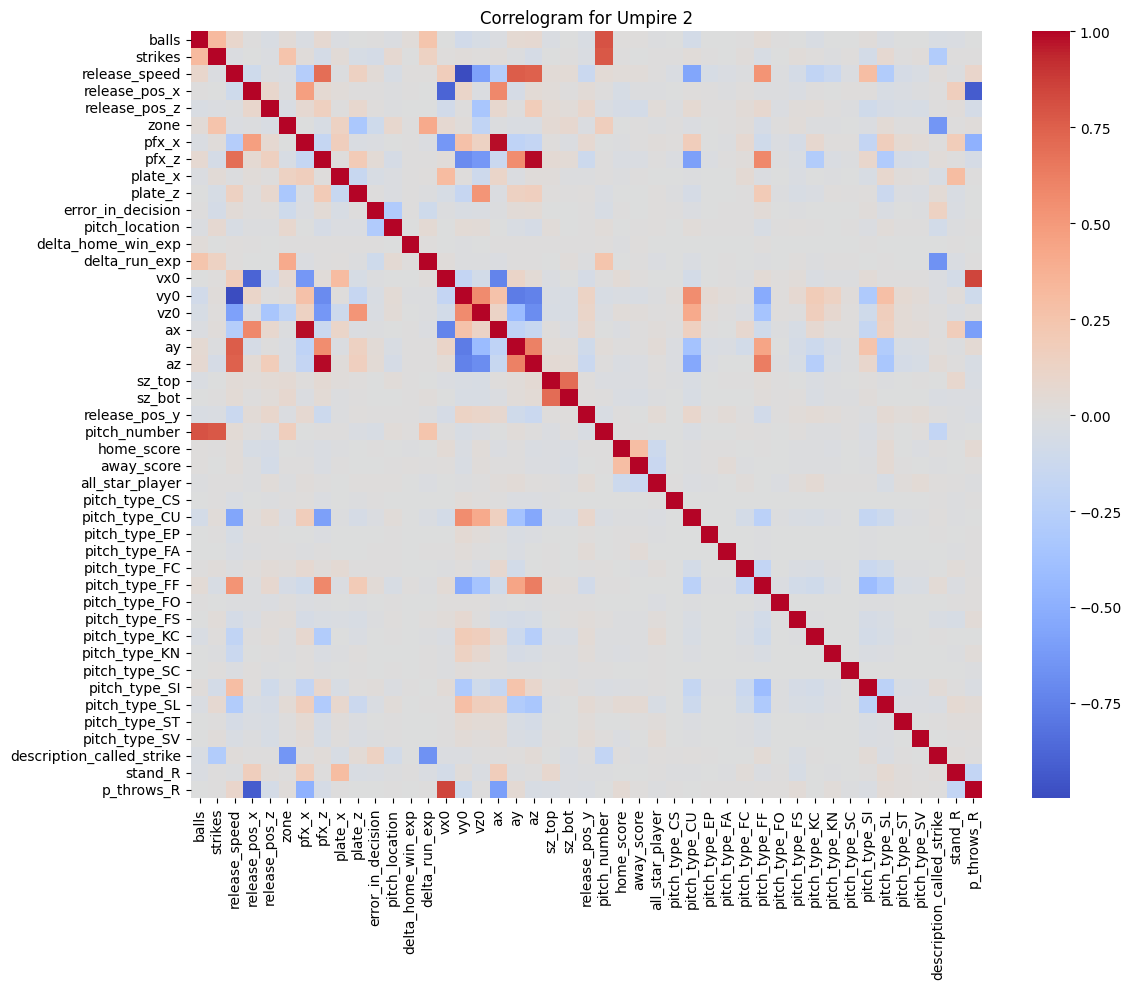

In [66]:

corr2 = ump2.corr(numeric_only=True)

plt.figure(figsize=(12, 10), layout="tight")
sns.heatmap(corr2, cmap='coolwarm', center=0, annot_kws={"size": 5})
plt.title("Correlogram for Umpire 2")
plt.show()

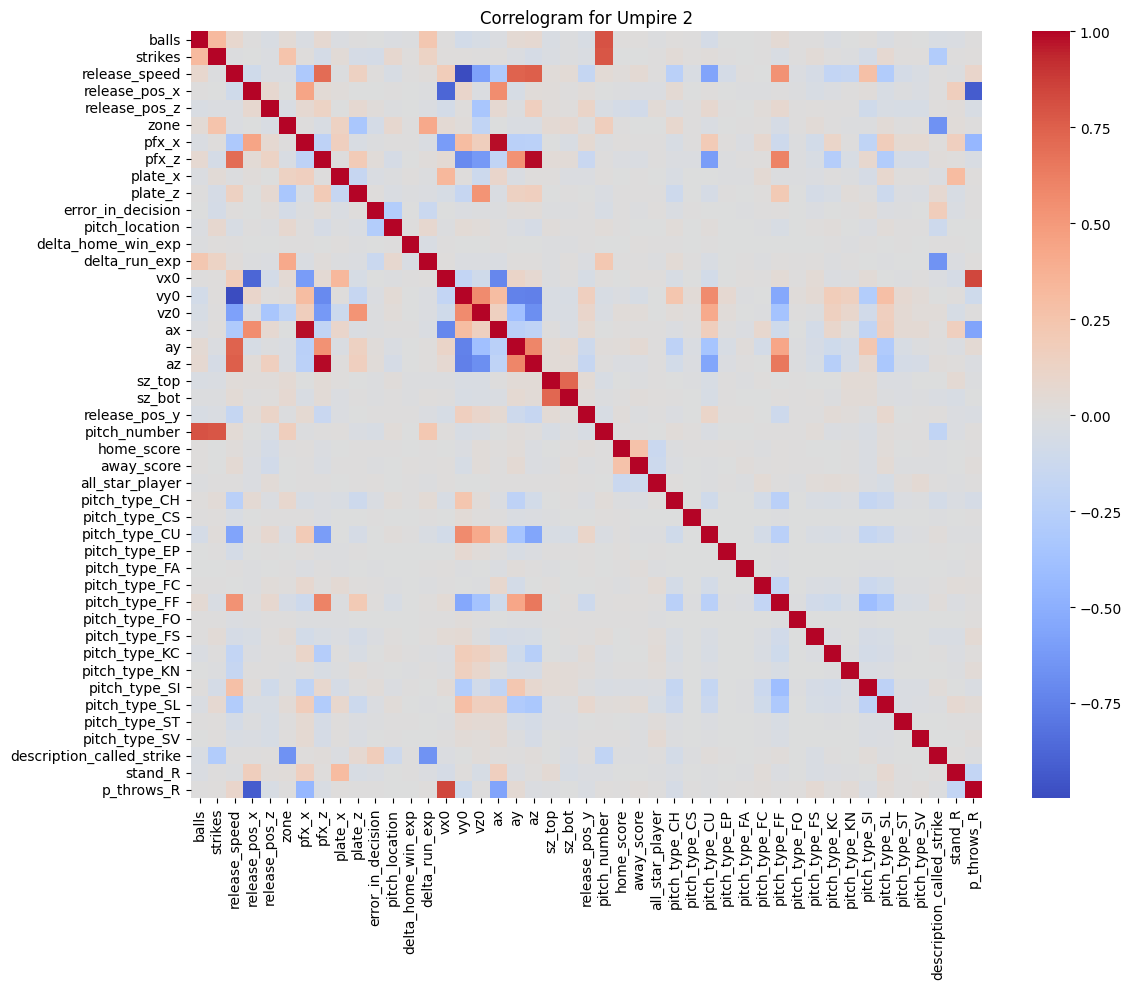

In [67]:
corr3 = ump3.corr(numeric_only=True)

plt.figure(figsize=(12, 10), layout="tight")
sns.heatmap(corr3, cmap='coolwarm', center=0, annot_kws={"size": 5})
plt.title("Correlogram for Umpire 2")
plt.show()

In [68]:
# drop based on correlations
ump1 = ump1.drop(columns=['ax', 'az', 'release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'pitch_number'], errors='ignore')

ump2 = ump2.drop(columns=['ax', 'az', 'release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'pitch_number'], errors='ignore')

ump3 = ump3.drop(columns=['ax', 'az', 'release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'pitch_number'], errors='ignore')


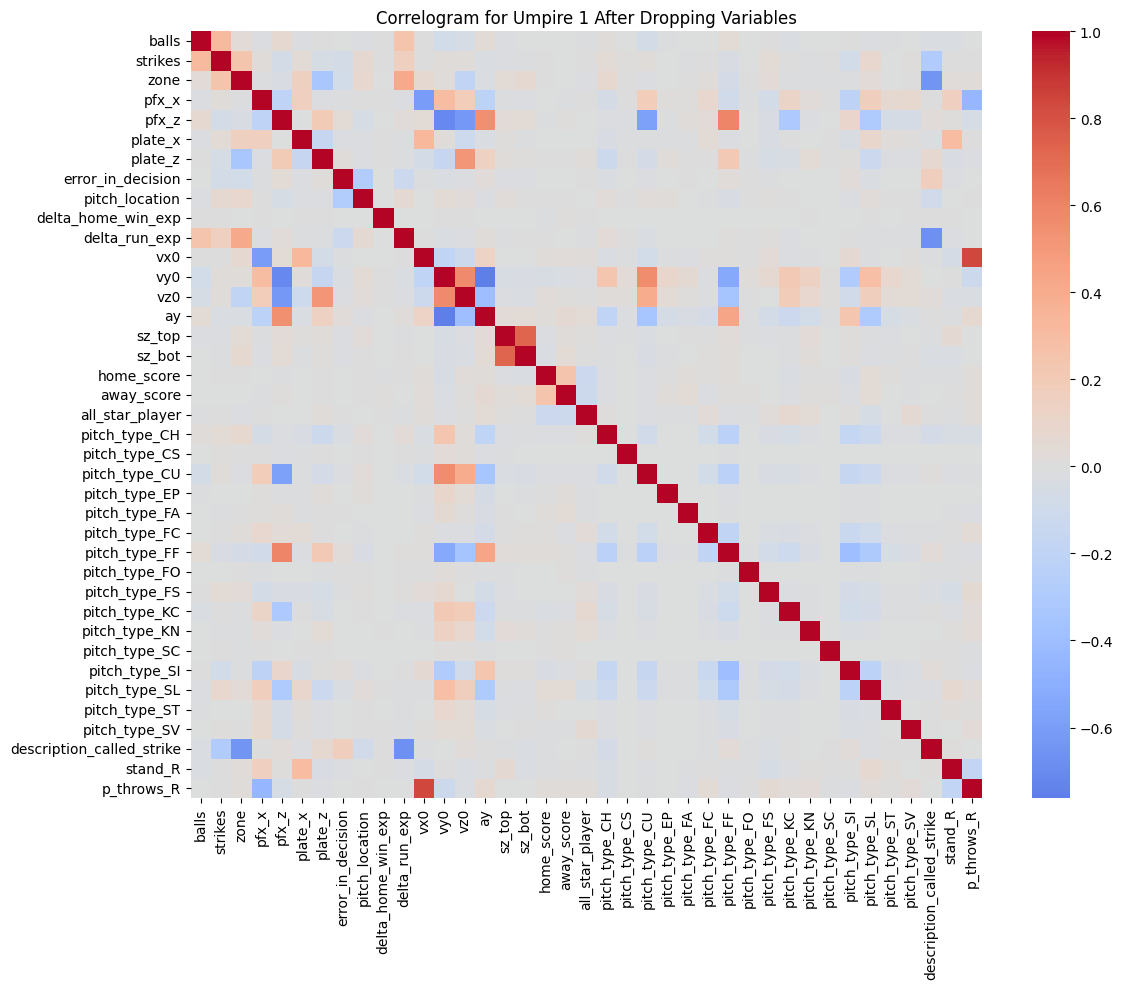

In [69]:
corr = ump1.corr(numeric_only=True)

plt.figure(figsize=(12, 10), layout="tight")
sns.heatmap(corr, cmap='coolwarm', center=0, annot_kws={"size": 5})
plt.title("Correlogram for Umpire 1 After Dropping Variables")
plt.show()

## Pairplot

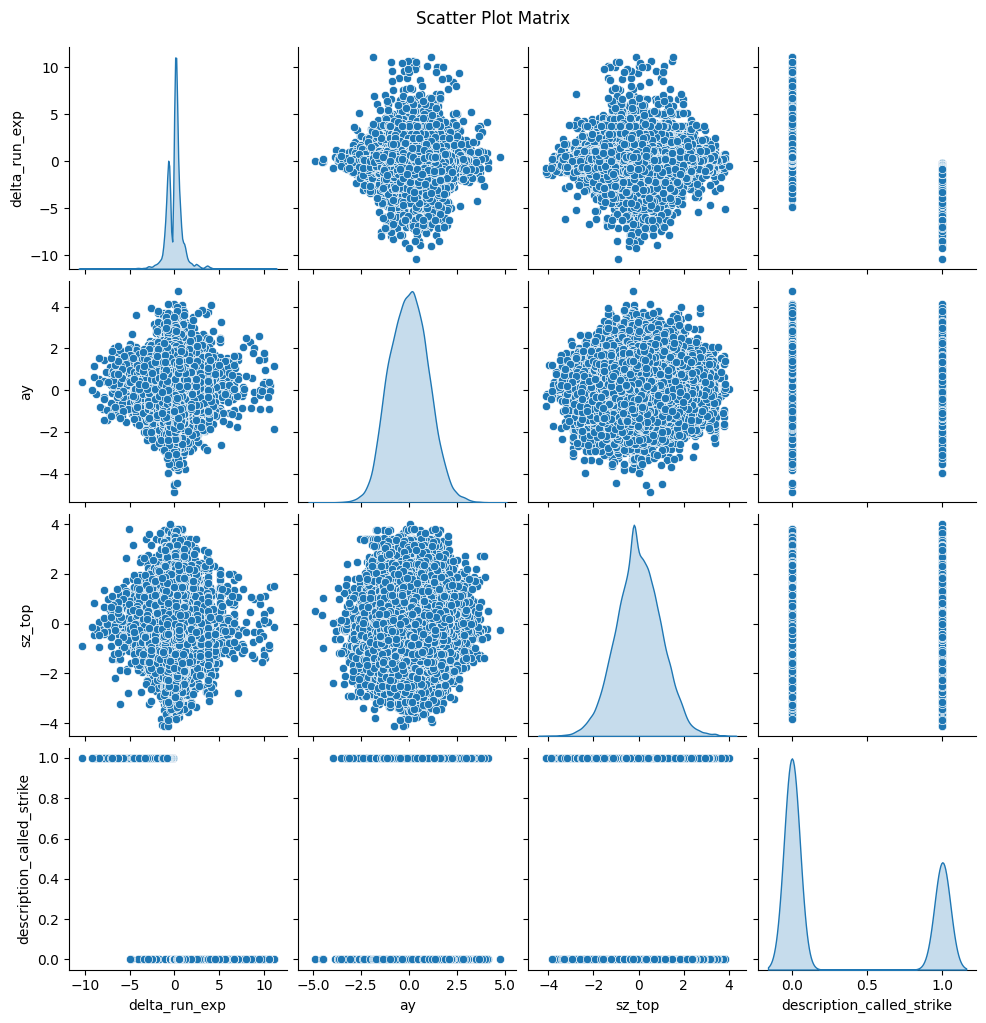

In [70]:
selected_cols = ["delta_run_exp", "ay", "sz_top", "description_called_strike"]
sns.pairplot(ump1[selected_cols], diag_kind="kde")
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

In [71]:
ump1.to_csv("data/cleaned/Umpire_1_cleaned.csv", index=False)
ump2.to_csv("data/cleaned/Umpire_2_cleaned.csv", index=False)
ump3.to_csv("data/cleaned/Umpire_3_cleaned.csv", index=False)
